# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



# Question 1

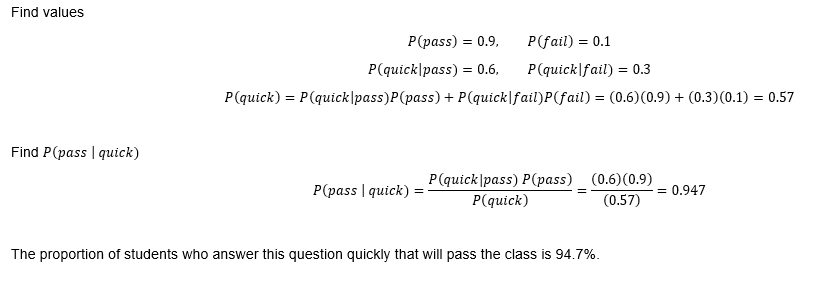

# Question 2

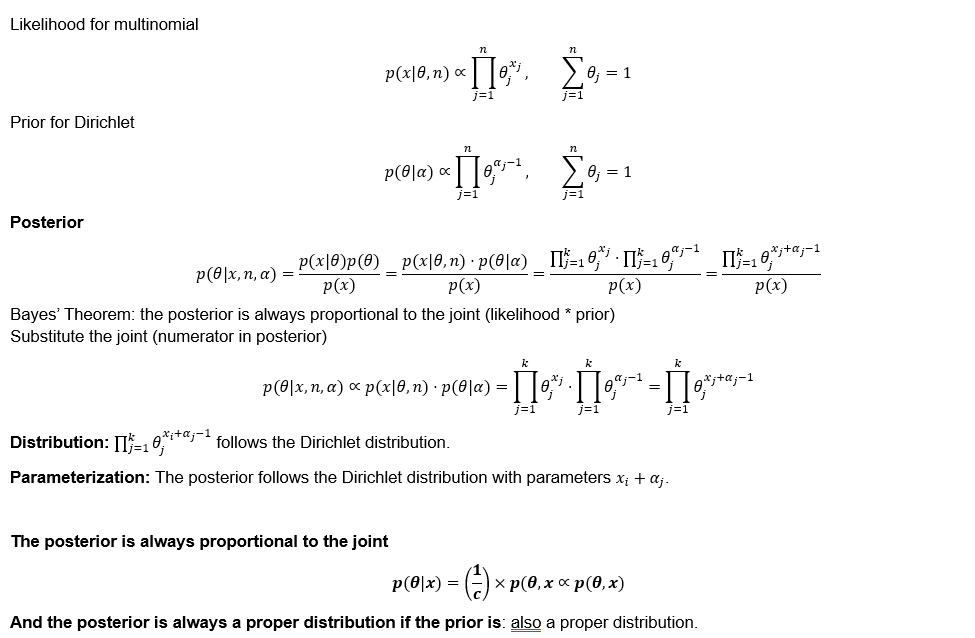

Citation: Expressions of likelihood and prior from Textbook http://www.stat.columbia.edu/~gelman/book/BDA3.pdf (Bayesian Data Analysis Third edition) page 69 (linked on Piazza by prof)

# Question 3

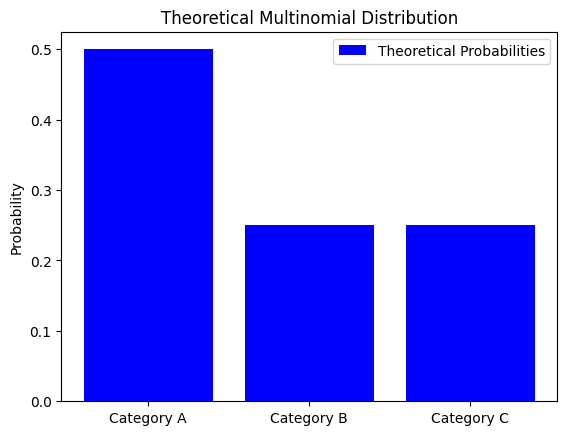

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

categories = ["Category A", "Category B", "Category C"]
probabilities = [0.5, 0.25, 0.25]  

plt.bar(categories, probabilities, color="blue", label="Theoretical Probabilities")
plt.title("Theoretical Multinomial Distribution")
plt.ylabel("Probability")
plt.legend()
plt.show()

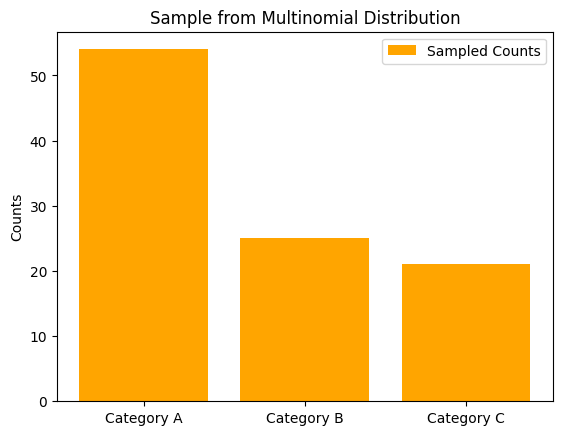

In [7]:
n_trials = 100
sample = multinomial.rvs(n=n_trials, p=probabilities, size=1)[0]

plt.bar(categories, sample, color="orange", label="Sampled Counts")
plt.title("Sample from Multinomial Distribution")
plt.ylabel("Counts")
plt.legend()
plt.show()

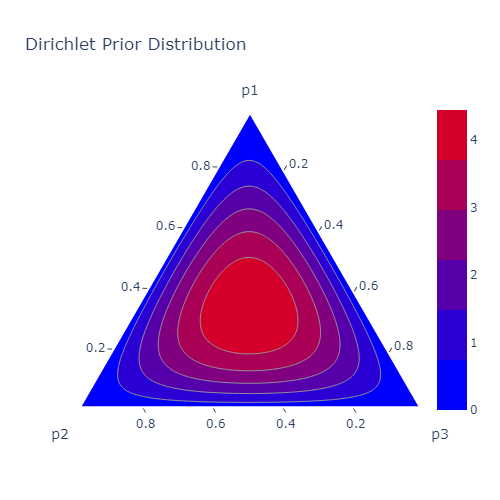

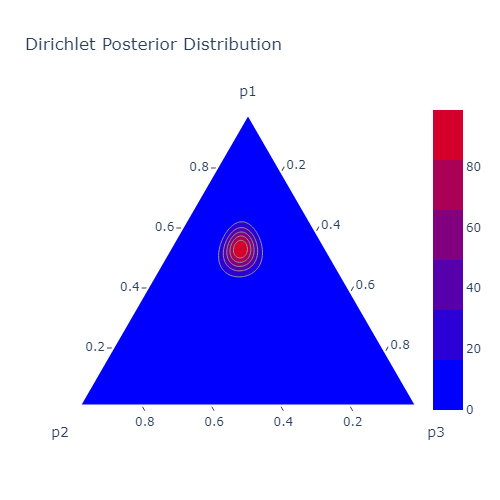

[2 2 2] [56 27 23]


In [8]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np

# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([2, 2, 2])  # Prior alpha values
alpha_posterior = alpha_prior + sample #

dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# https://plotly.com/python/ternary-contour/Links to an external site. 
fig_prior = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig_prior.update_layout(title="Dirichlet Prior Distribution")

fig_posterior = ff.create_ternary_contour(p.T, dirichlet_posterior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig_posterior.update_layout(title="Dirichlet Posterior Distribution")

fig_prior.show('png')
fig_posterior.show('png')

In [9]:
print("alpha_prior", alpha_prior)
print("alpha_posterior", alpha_posterior)

alpha_prior [2 2 2]
alpha_posterior [56 27 23]
